In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

In [27]:
import tensorflow as tf
import keras
import os 
import time
#import cv2
import numpy as np
#import matplotlib.pyplot as plt
from keras import optimizers
import keras
import tensorflow as tf
import keras.backend as K
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
from keras.models import Sequential
from keras.regularizers import l2
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
#import matplotlib.pyplot as plt
#from tqdm import tqdm
from keras.utils import np_utils
#from imgaug import augmenters as iaa    
import itertools
%matplotlib inline
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras
import os
#from classification_models.keras import Classifiers
# GPU test
from tensorflow.python.client import device_lib
np.random.seed(42)
from keras.models import load_model
# Print version
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.regularizers import l2
import os, sys
import scipy.misc
from glob import glob
import numpy as np
import random 
import shutil 
import keras
import time
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, Activation,Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.models import Sequential
from keras.applications.densenet import DenseNet121
from keras.models import load_model
from keras.optimizers import Adam
from keras import optimizers
import pickle
import sys
import cv2

import tensorflow as tf


np.random.seed(1)

In [28]:
train_dir = "../input/corona1/Corona Dataset Final/train/"
valid_dir = "../input/corona1/Corona Dataset Final/test/"

img_width, img_height = 224, 224 

In [29]:

conv_base = tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_shape=(img_width, img_height, 3),
)


conv_base.summary()



Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [30]:


import os, shutil
from keras.preprocessing.image import ImageDataGenerator



datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 1664)) # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,3))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')
 
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, 2613) 
validation_features, validation_labels = extract_features(valid_dir, 660)



Found 2613 images belonging to 3 classes.
Found 660 images belonging to 3 classes.


In [31]:
train_features.shape

(2613, 7, 7, 1664)

In [32]:
validation_features.shape

(660, 7, 7, 1664)

epochs = 20

model = Sequential()

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(7,7,1024)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [33]:

epochs = 40

model = Sequential()

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(7,7,1664)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 5, 5, 32)          479264    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 483,491
Trainable params: 483,491
Non-trainable params: 0
________________________________________________

In [34]:
def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

In [35]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')  


from keras.optimizers import Adam
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])


history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(validation_features, validation_labels))

Epoch 1/40
82/82 [==============================] - 5s 58ms/step - loss: 0.7995 - acc: 0.7671 - val_loss: 0.2036 - val_acc: 0.9318

Epoch 00001: val_acc improved from -inf to 0.93182, saving model to model-001-0.877918-0.931818.h5
Epoch 2/40
82/82 [==============================] - 4s 48ms/step - loss: 0.1388 - acc: 0.9549 - val_loss: 0.1471 - val_acc: 0.9455

Epoch 00002: val_acc improved from 0.93182 to 0.94545, saving model to model-002-0.951397-0.945455.h5
Epoch 3/40
82/82 [==============================] - 4s 49ms/step - loss: 0.1075 - acc: 0.9606 - val_loss: 0.1490 - val_acc: 0.9455

Epoch 00003: val_acc did not improve from 0.94545
Epoch 4/40
82/82 [==============================] - 4s 49ms/step - loss: 0.0733 - acc: 0.9734 - val_loss: 0.1321 - val_acc: 0.9530

Epoch 00004: val_acc improved from 0.94545 to 0.95303, saving model to model-004-0.973594-0.953030.h5
Epoch 5/40
82/82 [==============================] - 4s 49ms/step - loss: 0.0575 - acc: 0.9785 - val_loss: 0.1391 - val_

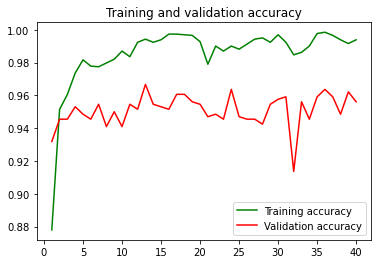

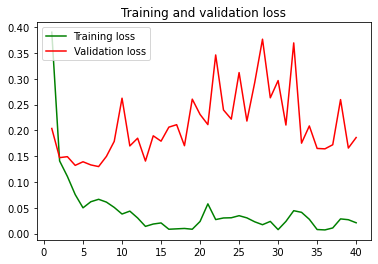

In [36]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']

val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



plt.show()

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
from keras.preprocessing import image

In [39]:
from keras.preprocessing import image
def prediction(img_path):
    org_img = image.load_img(img_path)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(org_img)                           
    plt.axis('off')
    plt.show()


    # Extract features
    features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

    # Make prediction
    try:
        prediction = model.predict(features)
    except:
        prediction = model.predict(features.reshape(1, 7*7*512))
        
    classes = ["Covid","NonCovid","Pneumonia"]
    print("I see..."+str(classes[np.argmax(np.array(prediction[0]))]))

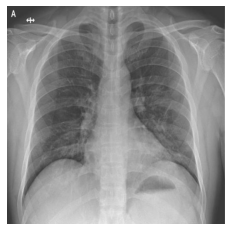

I see...Covid


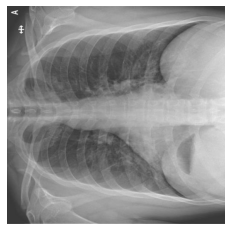

I see...Covid


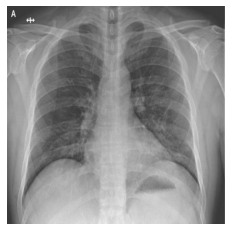

I see...Covid


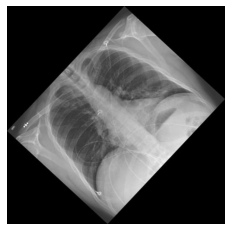

I see...Covid


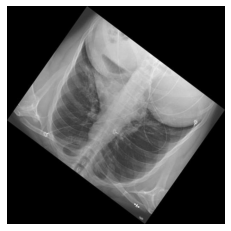

I see...Covid


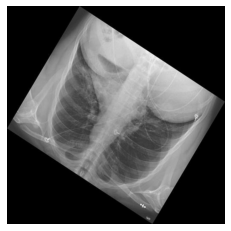

I see...Covid


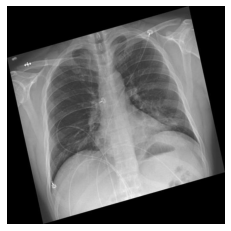

I see...Covid


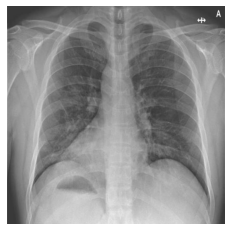

I see...Covid


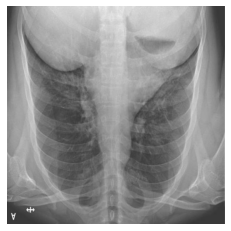

I see...Covid


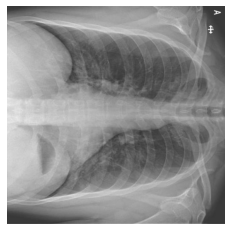

I see...Covid


In [40]:
pred_dir = "../input/corona1/Corona Dataset Final/val/Covid/"
import random
pred_files = random.sample(os.listdir(pred_dir),10)
for f in pred_files:
    prediction(pred_dir+f)

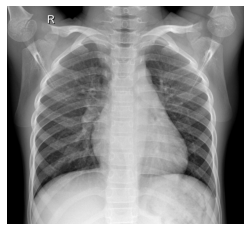

I see...NonCovid


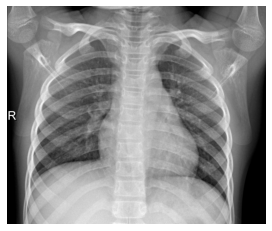

I see...NonCovid


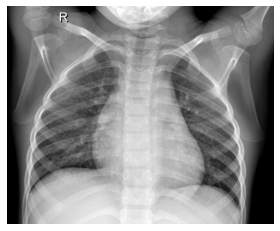

I see...NonCovid


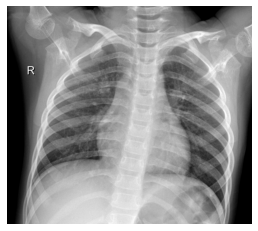

I see...NonCovid


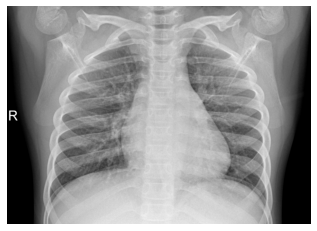

I see...NonCovid


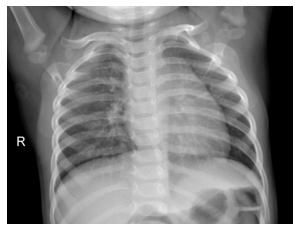

I see...NonCovid


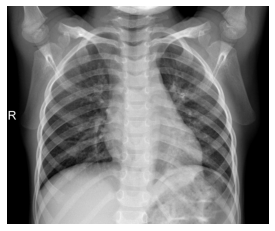

I see...NonCovid


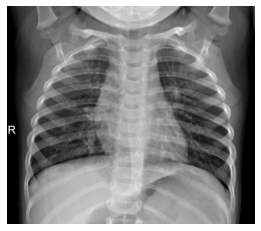

I see...NonCovid


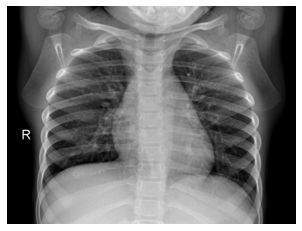

I see...NonCovid


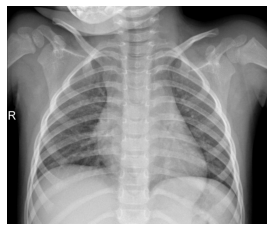

I see...NonCovid


In [41]:
pred_dir = "../input/corona1/Corona Dataset Final/val/NonCovid/"
import random
pred_files = random.sample(os.listdir(pred_dir),10)
for f in pred_files:
    prediction(pred_dir+f)

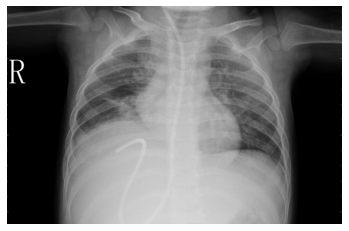

I see...Pneumonia


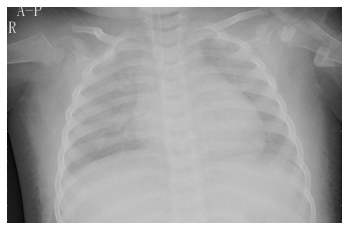

I see...Pneumonia


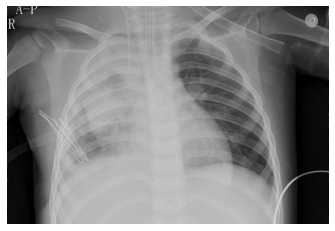

I see...Pneumonia


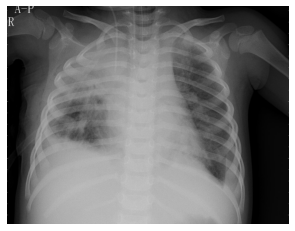

I see...Pneumonia


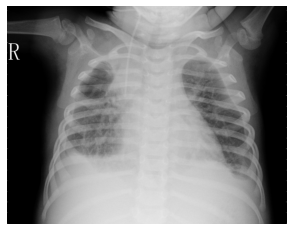

I see...Pneumonia


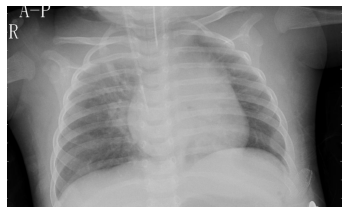

I see...Pneumonia


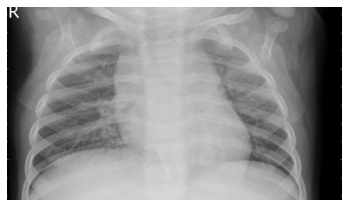

I see...Pneumonia


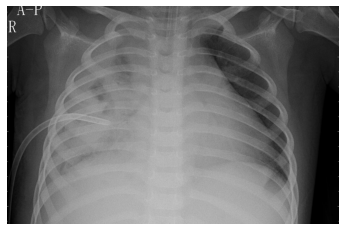

I see...Pneumonia


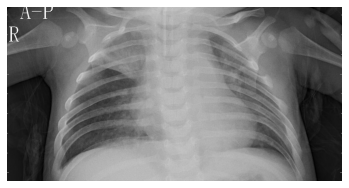

I see...Pneumonia


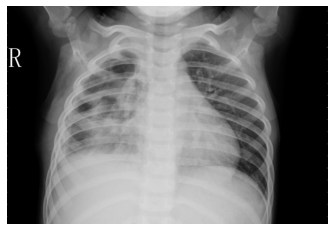

I see...Pneumonia


In [42]:
pred_dir = "../input/corona1/Corona Dataset Final/val/Pneumonia/"
import random
pred_files = random.sample(os.listdir(pred_dir),10)
for f in pred_files:
    prediction(pred_dir+f)

In [43]:
prediction = model.predict(validation_features)

In [44]:
prediction.shape

(660, 3)

https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel

In [45]:
pred = np.argmax(prediction, axis=1)
# label
validation_labels = np.argmax(validation_labels, axis=1)

In [46]:
print(validation_labels.shape, pred.shape)

(660,) (660,)


In [51]:
print(classification_report(validation_labels, pred, target_names = ['Covid','NonCovid','Pneumonia']))

              precision    recall  f1-score   support

       Covid       1.00      0.99      0.99       220
   Pneumonia       0.90      0.99      0.94       220
    NonCovid       0.97      0.90      0.93       220

    accuracy                           0.96       660
   macro avg       0.96      0.96      0.96       660
weighted avg       0.96      0.96      0.96       660

